In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.tokenize import word_tokenize
from textblob import TextBlob
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/santiagofischel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Setting up the right shape of the dataframe

In [71]:
df = pd.read_csv('../datasets/spotify_songs.csv')

In [72]:
df.shape

(32833, 23)

In [73]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [74]:
df.playlist_name.value_counts()

playlist_name
Indie Poptimism                                              308
2020 Hits & 2019  Hits – Top Global Tracks 🔥🔥🔥               247
Permanent Wave                                               244
Hard Rock Workout                                            219
Ultimate Indie Presents... Best Indie Tracks of the 2010s    198
                                                            ... 
CSR 103:9 (GTA: SA)                                            7
Big White Room-Jessie-J                                        7
TOP 50 GLOBAL 2020 UPDATED WEEKLY 🌍🎶 WORLDWIDE                 6
ALPAS Music Festival                                           3
Post-Teen Pop                                                  1
Name: count, Length: 449, dtype: int64

In [75]:
df.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

In [76]:
df.isna().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [77]:
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], format = 'mixed')


In [78]:
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [79]:
clean_df = df.dropna(subset=['track_name', 'track_artist', 'track_album_name'])

# Verifying the result
print("New DataFrame shape:", clean_df.shape)
clean_df.isnull().sum()

New DataFrame shape: (32828, 23)


track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [80]:
df.dtypes

track_id                            object
track_name                          object
track_artist                        object
track_popularity                     int64
track_album_id                      object
track_album_name                    object
track_album_release_date    datetime64[ns]
playlist_name                       object
playlist_id                         object
playlist_genre                      object
playlist_subgenre                   object
danceability                       float64
energy                             float64
key                                  int64
loudness                           float64
mode                                 int64
speechiness                        float64
acousticness                       float64
instrumentalness                   float64
liveness                           float64
valence                            float64
tempo                              float64
duration_ms                          int64
dtype: obje

In [81]:
df['duration_minutes'] = (df['duration_ms'] / 60000).round(2)

In [82]:
df.drop(columns=['duration_ms'], inplace=True)

should we change the types of categories?

# Starting to do EDA

In [83]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_minutes
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,3.25
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,2.71
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,2.94
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,2.82
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,3.15


In [84]:
df.drop('mode', axis=1, inplace=True) #this column is irrelevant + there are only two categories thus it can't really add that much value.


In [85]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = ['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_minutes']

# Initialize StandardScaler
scaler = MinMaxScaler()
df_compare = df.copy()
# Apply the scaler
df_compare[numeric_columns] = scaler.fit_transform(df_compare[numeric_columns])


<Axes: xlabel='playlist_genre'>

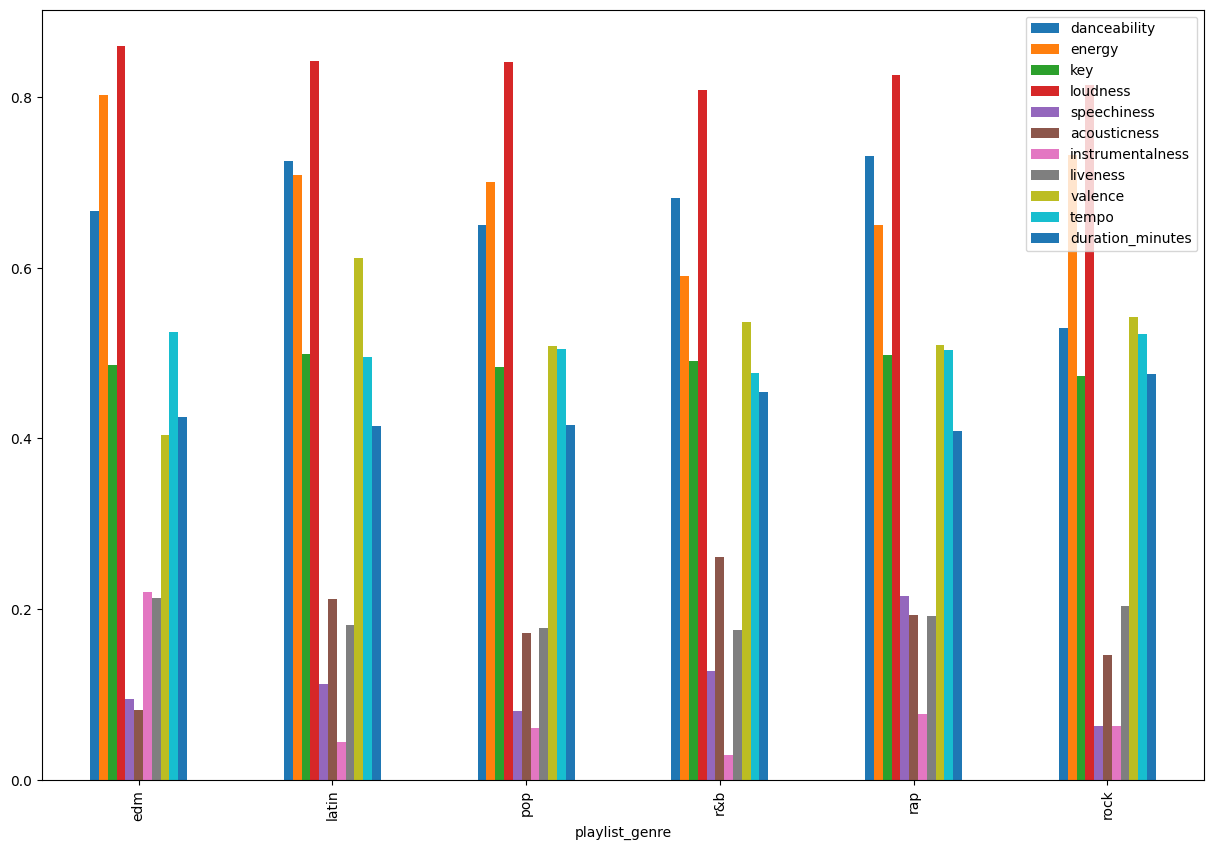

In [86]:
df_compare.groupby('playlist_genre')[['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_minutes']].mean().plot(kind='bar', figsize=(15, 10))

In [87]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_minutes
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.916,6,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,3.25
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.815,11,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972,2.71
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.931,1,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008,2.94
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.930,7,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956,2.82
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.833,1,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,3.15


/var/folders/gr/q7qsw30x1xqd0zv1tj58r0vw0000gn/T/ipykernel_41923/1401804104.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_compare.groupby('popularity_range')[['danceability', 'energy', 'key', 'loudness', 'speechiness',


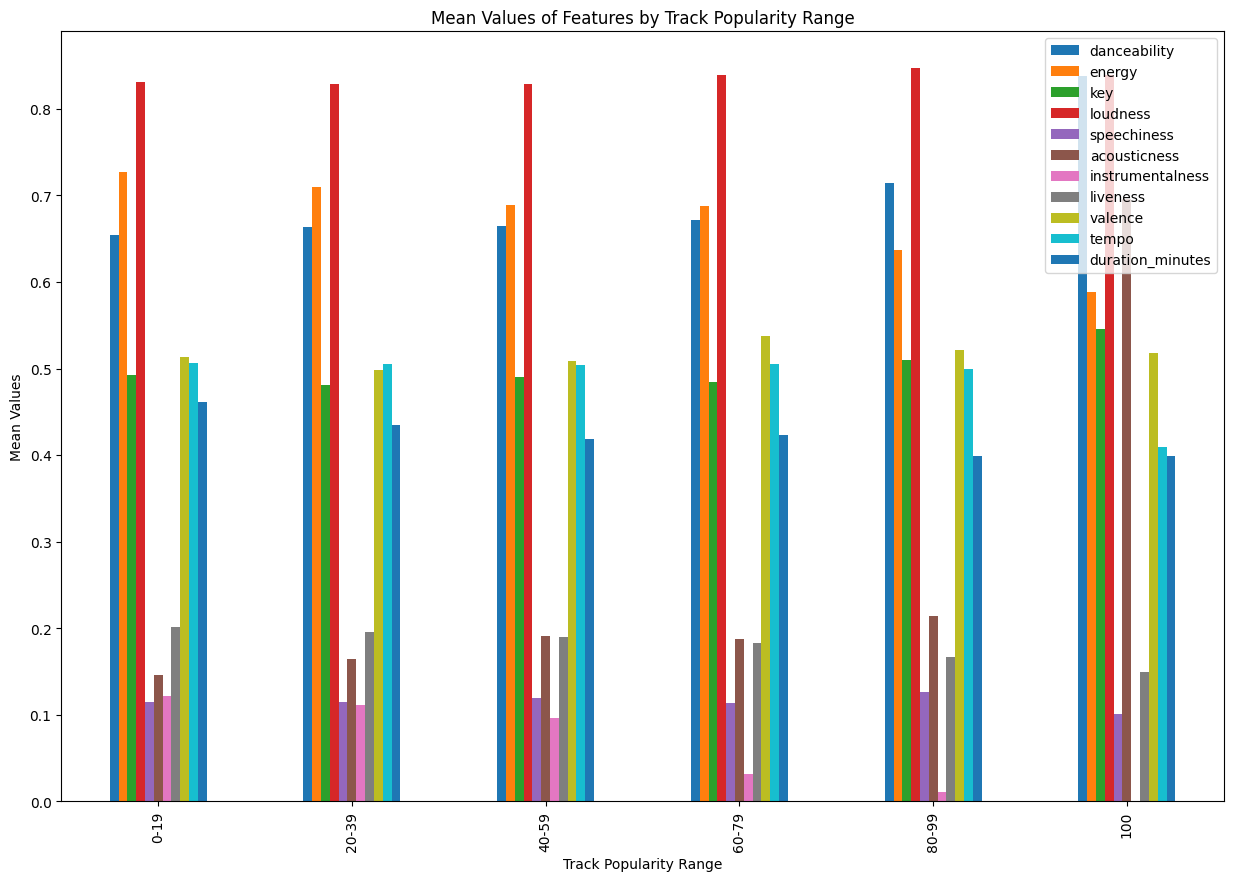

In [88]:
bins = [0, 19, 39, 59, 79, 99, 100]  # Adjust the bins as needed
labels = ['0-19', '20-39', '40-59', '60-79', '80-99', '100']  # Labels for the bins

# Bin 'track_popularity' and create a new column
df_compare['popularity_range'] = pd.cut(df_compare['track_popularity'], bins=bins, labels=labels, include_lowest=True)

# Group by the new 'popularity_range'
grouped_data = df_compare.groupby('popularity_range')[['danceability', 'energy', 'key', 'loudness', 'speechiness',
                                                       'acousticness', 'instrumentalness', 'liveness', 'valence', 
                                                       'tempo', 'duration_minutes']].mean()

# Plot
grouped_data.plot(kind='bar', figsize=(15, 10))
plt.xlabel('Track Popularity Range')
plt.ylabel('Mean Values')
plt.title('Mean Values of Features by Track Popularity Range')
plt.show()

<Axes: xlabel='track_popularity'>

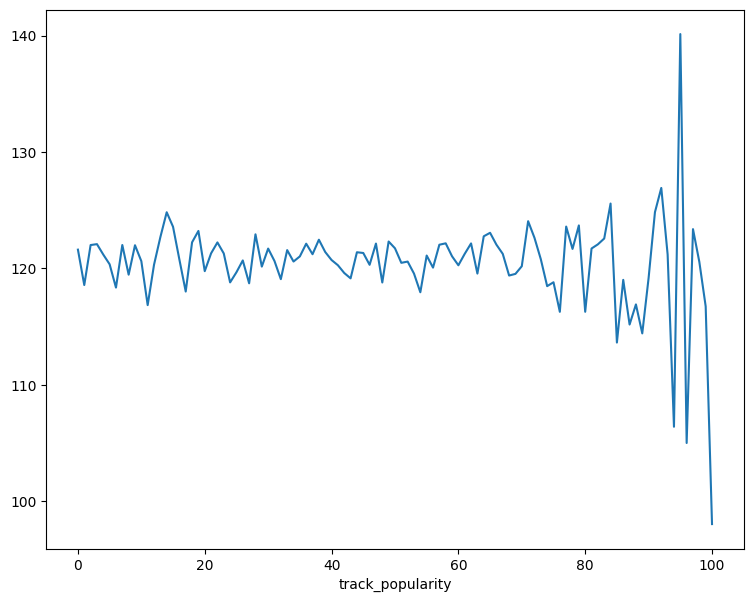

In [89]:
df.groupby('track_popularity')['tempo'].mean().plot(kind='line', figsize=(9, 7))

In [90]:
# Select columns where the dtype is 'object'
numeric_columns = df.loc[:, df.dtypes != 'object']
numeric_columns.columns


Index(['track_popularity', 'track_album_release_date', 'danceability',
       'energy', 'key', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_minutes'],
      dtype='object')

In [91]:
df.dtypes
categories = ['playlist_genre', 'playlist_subgenre', 'track_artist', 'track_album_name']

# Encoding

In [92]:
import json
import csv

label_mappings = {}

# Iterate over columns and apply LabelEncoder to object type columns
for column in categories:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

        # Store the mapping for this specific column
        label_mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

# Print the label mappings
print("Label Encoding mappings:")
for column, mapping in label_mappings.items():
    print(f"{column}: {mapping}")

# Define the file path for the CSV file
csv_file_path = 'track_artist_mapping.csv'

# Export the dictionary as a CSV file
with open(csv_file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['track_artist', 'label'])
    for artist, label in label_mappings['track_artist'].items():
        writer.writerow([artist, label])

print(f"Track artist dictionary exported as CSV: {csv_file_path}")


Label Encoding mappings:
playlist_genre: {'edm': 0, 'latin': 1, 'pop': 2, 'r&b': 3, 'rap': 4, 'rock': 5}
playlist_subgenre: {'album rock': 0, 'big room': 1, 'classic rock': 2, 'dance pop': 3, 'electro house': 4, 'electropop': 5, 'gangster rap': 6, 'hard rock': 7, 'hip hop': 8, 'hip pop': 9, 'indie poptimism': 10, 'latin hip hop': 11, 'latin pop': 12, 'neo soul': 13, 'new jack swing': 14, 'permanent wave': 15, 'pop edm': 16, 'post-teen pop': 17, 'progressive electro house': 18, 'reggaeton': 19, 'southern hip hop': 20, 'trap': 21, 'tropical': 22, 'urban contemporary': 23}
track_artist: {'!!!': 0, '!deladap': 1, '"Dear Evan Hansen" August 2018 Broadway Cast': 2, '#TocoParaVos': 3, '$ANFI': 4, '$IFRA': 5, '$uicideBoy$': 6, "'Til Tuesday": 7, '(G)I-DLE': 8, '(Sandy) Alex G': 9, '(dc)': 10, '*NSYNC': 11, '-M-': 12, '.Sinh': 13, '.SØN': 14, '015B': 15, '03 Greedo': 16, '10 Years': 17, '10cc': 18, '11 Acorn Lane': 19, '11 LIT3S': 20, '112': 21, '11:11': 22, '13-Side': 23, '18 Karat': 24, '18 K

# Understanding feature importance

In [93]:
df.dtypes

track_id                            object
track_name                          object
track_artist                         int64
track_popularity                     int64
track_album_id                      object
track_album_name                     int64
track_album_release_date    datetime64[ns]
playlist_name                       object
playlist_id                         object
playlist_genre                       int64
playlist_subgenre                    int64
danceability                       float64
energy                             float64
key                                  int64
loudness                           float64
speechiness                        float64
acousticness                       float64
instrumentalness                   float64
liveness                           float64
valence                            float64
tempo                              float64
duration_minutes                   float64
dtype: object

In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd


X = df.select_dtypes(include=[np.number]).drop(columns=['track_popularity'])
y = df['track_popularity']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize and train the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Print the feature importances
print(feature_importances)


loudness             0.081793
duration_minutes     0.079284
instrumentalness     0.077480
energy               0.077267
tempo                0.075958
track_album_name     0.071180
track_artist         0.069822
danceability         0.068585
speechiness          0.067332
valence              0.066651
acousticness         0.066626
liveness             0.065709
playlist_subgenre    0.063627
playlist_genre       0.035432
key                  0.033253
dtype: float64


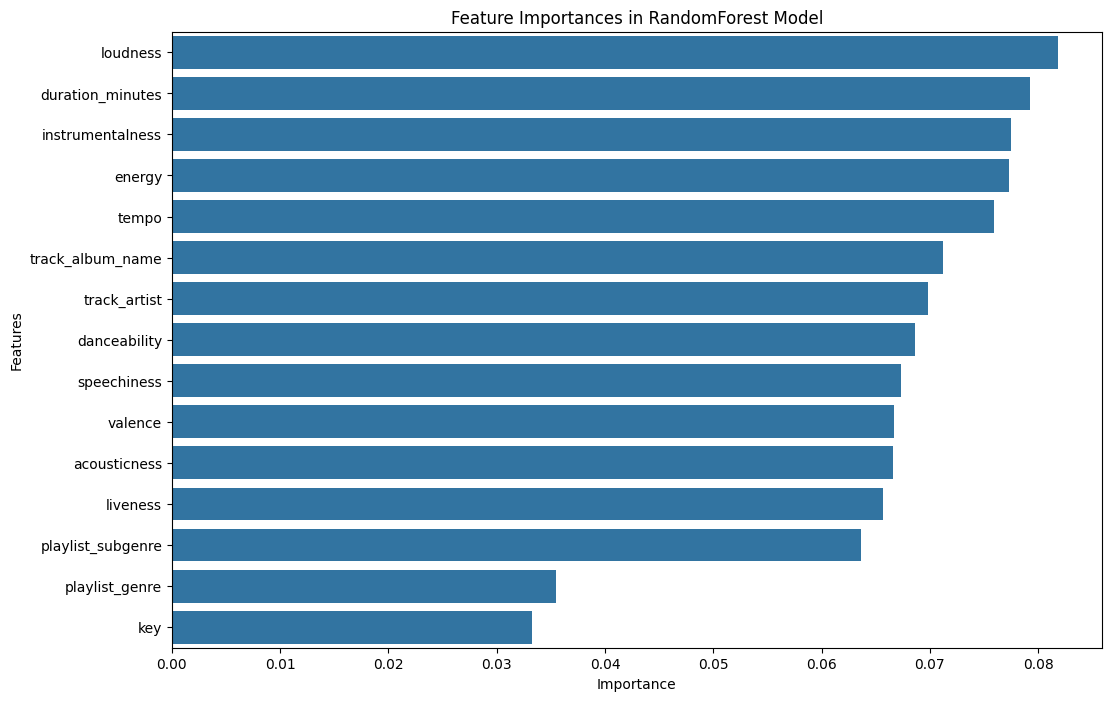

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.barplot(x=feature_importances, y=feature_importances.index)

plt.title('Feature Importances in RandomForest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


- ver si quiero drop those que no son tan importantes

# Understanding distribution

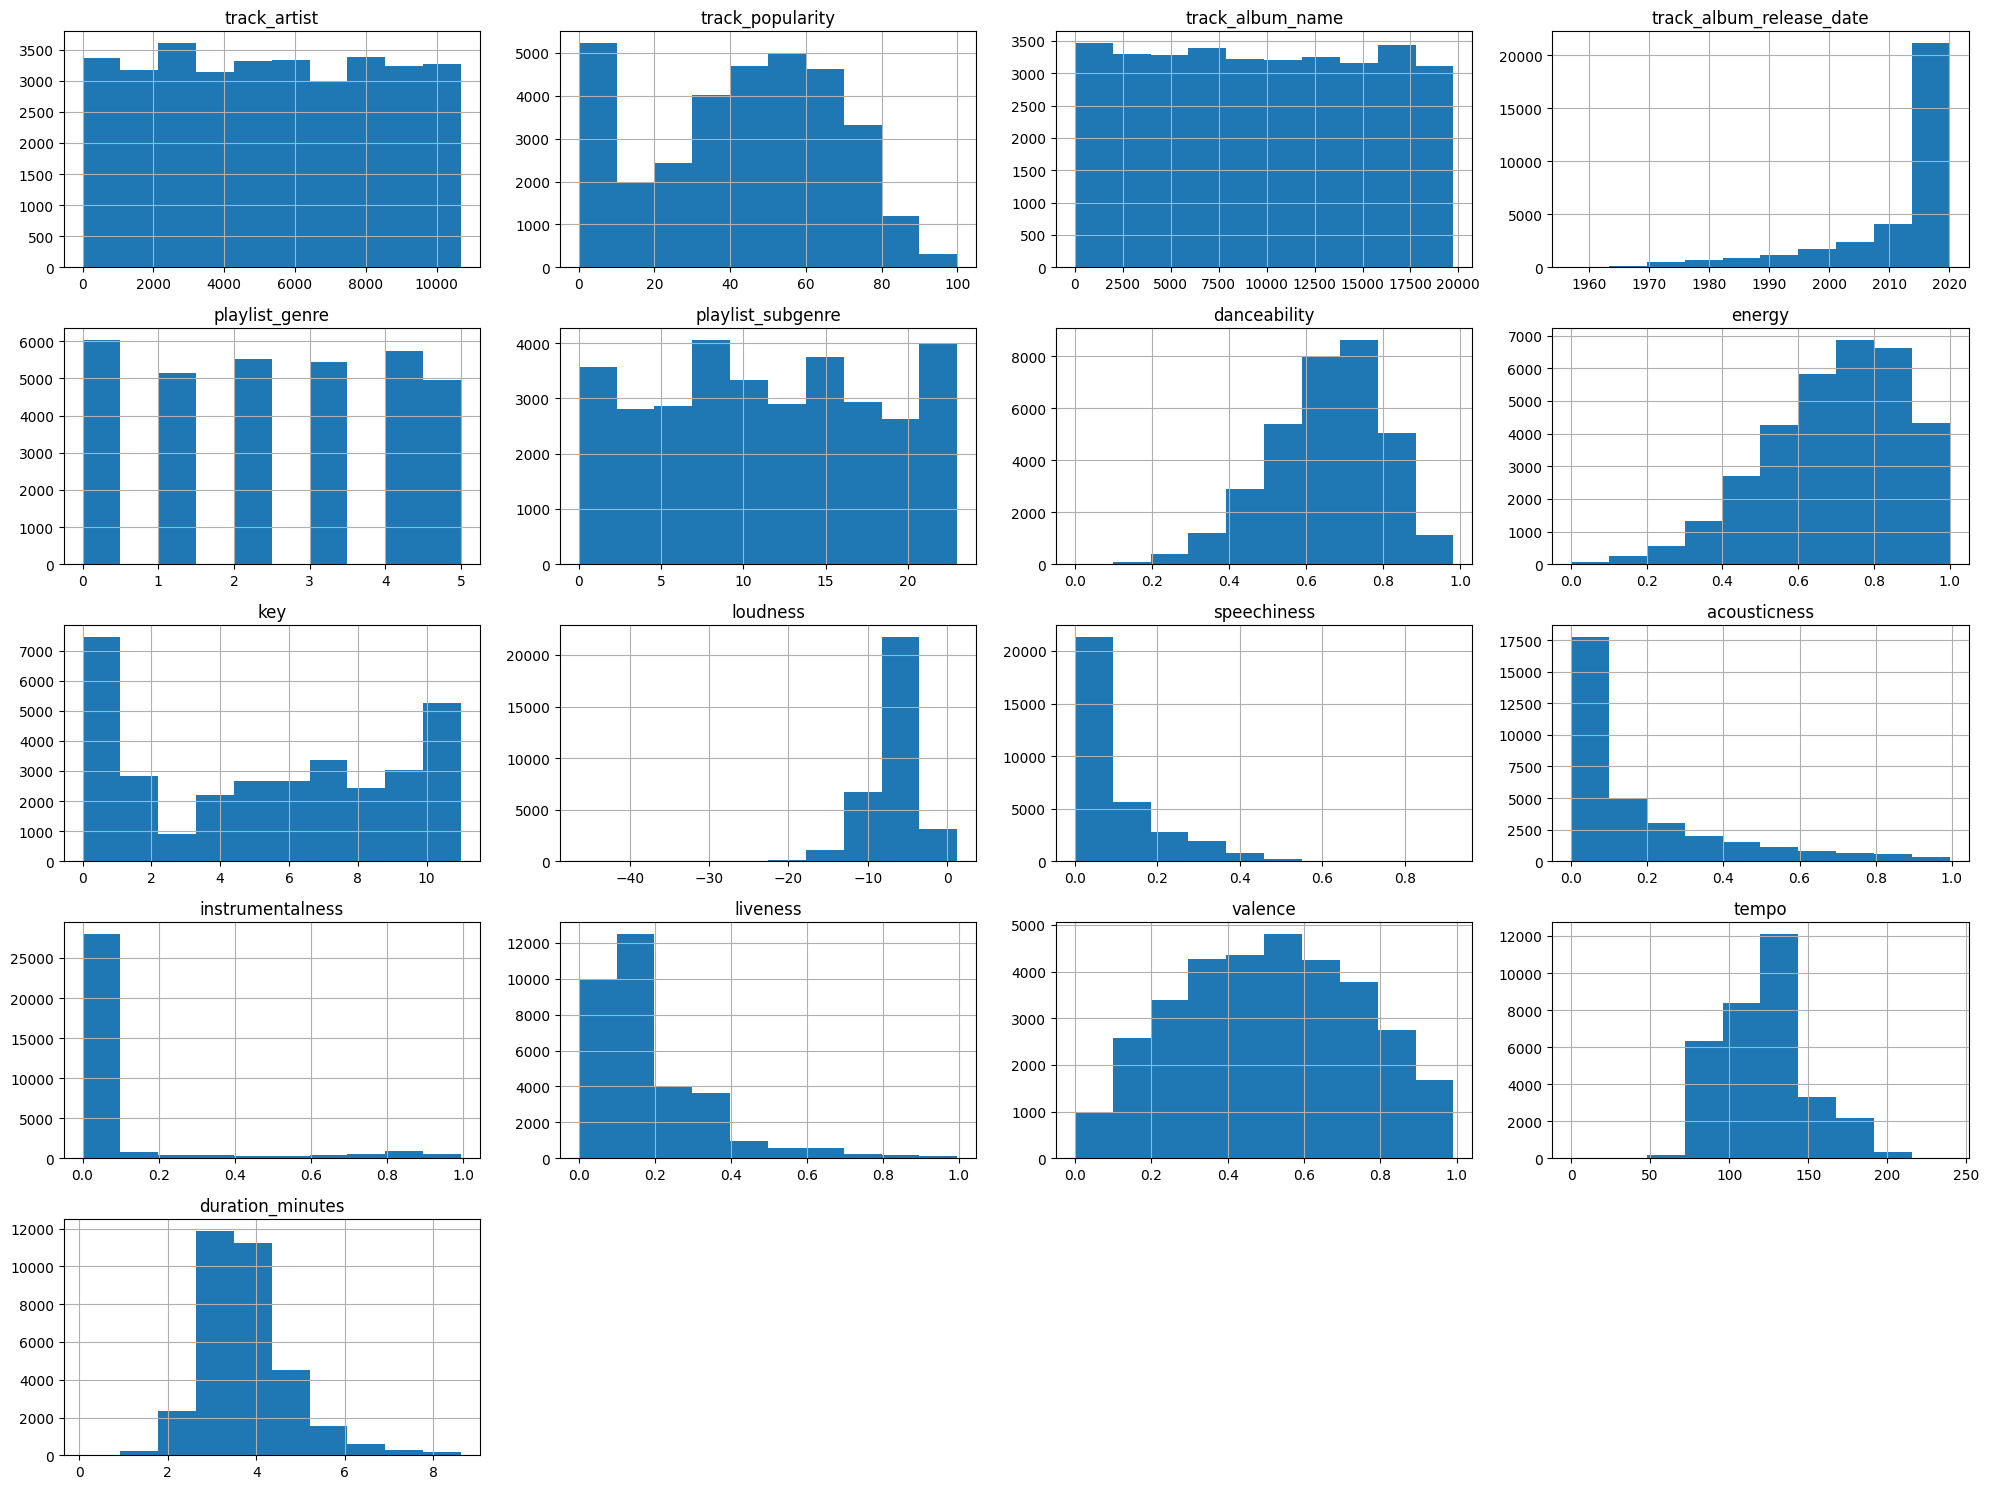

In [96]:
df.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()


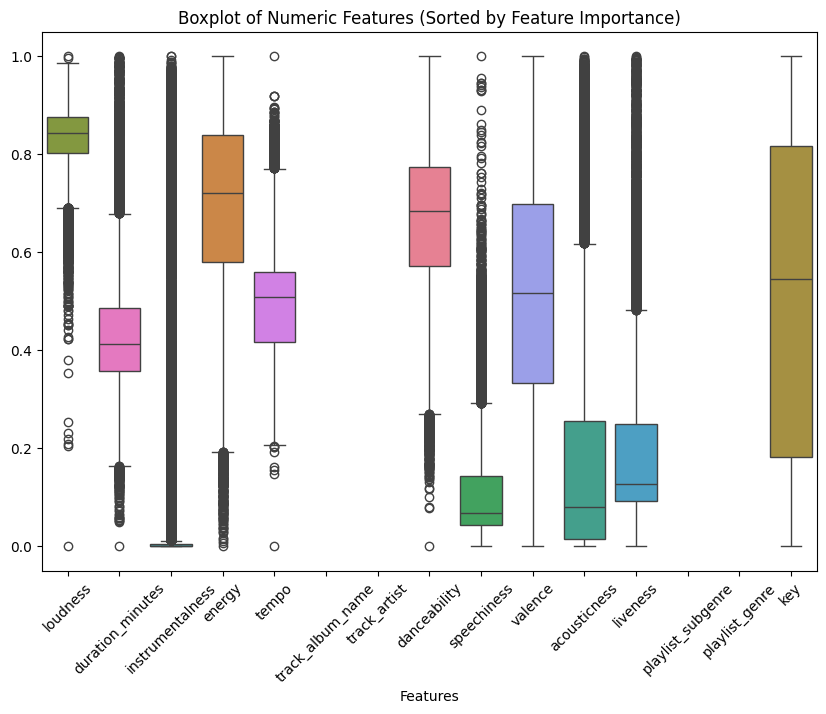

In [97]:
plt.figure(figsize=(10, 7))

# Sort the features by importance
sorted_features = feature_importances.index

# Create the boxplot
sns.boxplot(data=df_compare.drop('track_popularity', axis=1), order=sorted_features)

plt.title('Boxplot of Numeric Features (Sorted by Feature Importance)')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()


In [98]:
df.dropna(inplace=True)

In [99]:
df.dtypes

track_id                            object
track_name                          object
track_artist                         int64
track_popularity                     int64
track_album_id                      object
track_album_name                     int64
track_album_release_date    datetime64[ns]
playlist_name                       object
playlist_id                         object
playlist_genre                       int64
playlist_subgenre                    int64
danceability                       float64
energy                             float64
key                                  int64
loudness                           float64
speechiness                        float64
acousticness                       float64
instrumentalness                   float64
liveness                           float64
valence                            float64
tempo                              float64
duration_minutes                   float64
dtype: object

In [100]:
ids = ['track_id', 'track_album_id', 'playlist_id'] #I don't know how to treat this data because it's not numerical and it's not categorical either.

In [101]:
df.select_dtypes(include=['object']).head()

,track_id,track_name,track_album_id,playlist_name,playlist_id
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,2oCs0DGTsRO98Gh5ZSl2Cx,Pop Remix,37i9dQZF1DXcZDD7cfEKhW
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,63rPSO264uRjW1X5E6cWv6,Pop Remix,37i9dQZF1DXcZDD7cfEKhW
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,1HoSmj2eLcsrR0vE9gThr4,Pop Remix,37i9dQZF1DXcZDD7cfEKhW
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,1nqYsOef1yKKuGOVchbsk6,Pop Remix,37i9dQZF1DXcZDD7cfEKhW
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,7m7vv9wlQ4i0LFuJiE2zsQ,Pop Remix,37i9dQZF1DXcZDD7cfEKhW


I'm going to preprocess the playlist_name column to remove symbols and other things, to make it easier for the algorithm to understand simmilarities between playlists. 

In [102]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/santiagofischel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/santiagofischel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [103]:

df['playlist_name'] = df['playlist_name'].str.lower()
df['playlist_name'] = df['playlist_name'].apply(lambda x: ' '.join(word for word in word_tokenize(x) if word.isalpha()))
df['playlist_name'] = df['playlist_name'].apply(lambda x: ' '.join(word for word in word_tokenize(x) if word not in stopwords.words('english')))


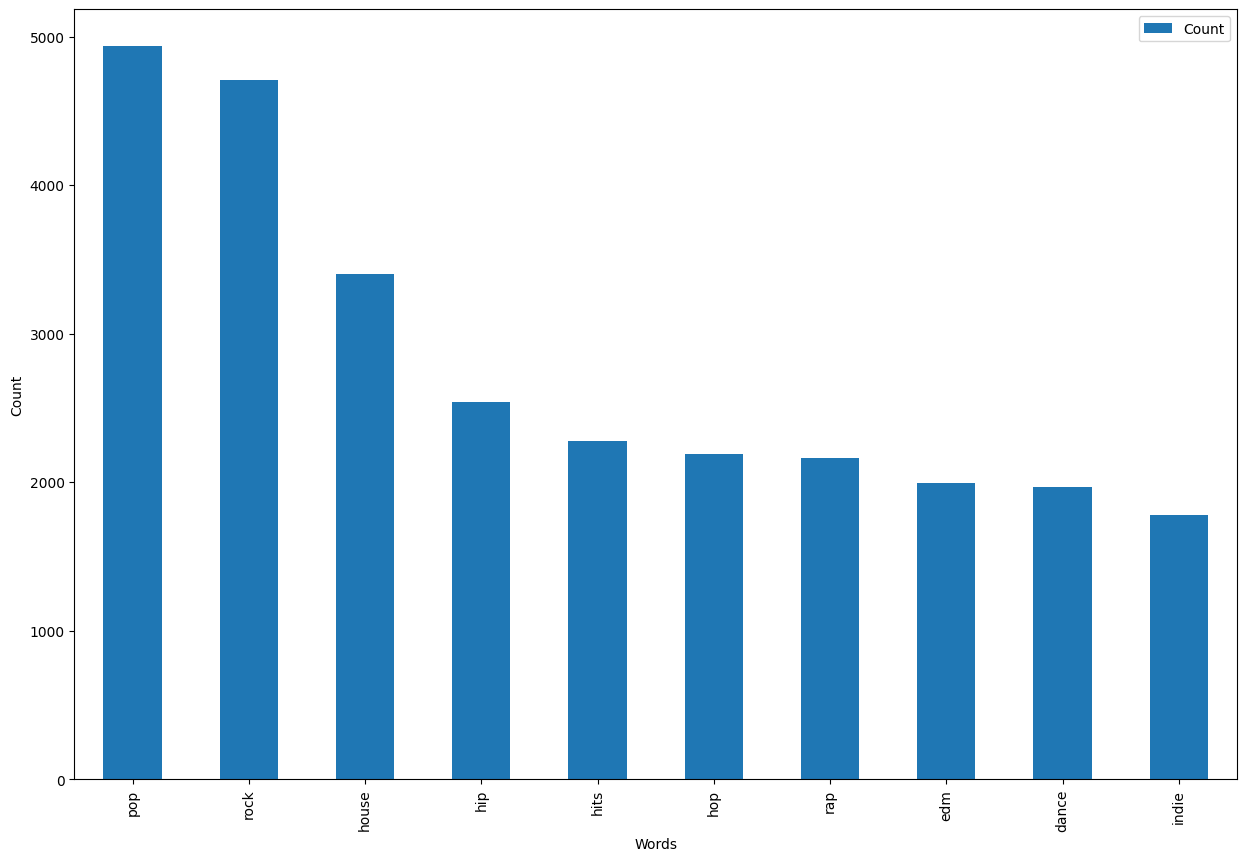

In [104]:
from collections import Counter

# Tokenize and count word occurrences in playlist_name
word_counts = Counter(' '.join(df['playlist_name']).split())

# Convert word_counts to a dataframe
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['Count'])

# Sort the dataframe by count in descending order
word_counts_df = word_counts_df.sort_values(by='Count', ascending=False)

# Select the top 10 words
top_10_words = word_counts_df.head(10)

# Plot the top 10 word occurrences in a bar graph
top_10_words.plot(kind='bar', figsize=(15, 10))
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()


In [105]:
df['playlist_genre'].value_counts()

playlist_genre
0    6043
4    5743
2    5507
3    5431
1    5153
5    4951
Name: count, dtype: int64

By looking at the top words in playlist_name, I can see that I'm satisfied with my preprocessing in the column. I was scared I was going to get variants of the same word (which would require lemmatization, but that is not the case).

In [106]:
df['track_name_preprocessed'] = df['track_name'].str.lower()
df['track_name_preprocessed'] = df['track_name_preprocessed'].apply(lambda x: ' '.join(word for word in word_tokenize(x) if word.isalpha()))
df['track_name_preprocessed'] = df['track_name_preprocessed'].apply(lambda x: ' '.join(word for word in word_tokenize(x) if word not in stopwords.words('english')))
df['track_name_preprocessed'].head()

0    care justin bieber loud luxury remix
1           memories dillon francis remix
2                       time diablo remix
3             call mine keanu silva remix
4       someone loved future humans remix
Name: track_name_preprocessed, dtype: object

Now I want to add some additional information to the dataframe in order to make it easier to cluster, I want to add the sentiment of the song name and the sentiment of the playlist as a column. I have the hypotehsis that this information will be useful for clustering. 

In [107]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_minutes,track_name_preprocessed
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,2782,66,2oCs0DGTsRO98Gh5ZSl2Cx,7614,2019-06-14,pop remix,37i9dQZF1DXcZDD7cfEKhW,2,...,6,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,3.25,care justin bieber loud luxury remix
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,6084,67,63rPSO264uRjW1X5E6cWv6,10410,2019-12-13,pop remix,37i9dQZF1DXcZDD7cfEKhW,2,...,11,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972,2.71,memories dillon francis remix
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,10416,70,1HoSmj2eLcsrR0vE9gThr4,985,2019-07-05,pop remix,37i9dQZF1DXcZDD7cfEKhW,2,...,1,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008,2.94,time diablo remix
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,9215,60,1nqYsOef1yKKuGOVchbsk6,2798,2019-07-19,pop remix,37i9dQZF1DXcZDD7cfEKhW,2,...,7,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956,2.82,call mine keanu silva remix
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,5402,69,7m7vv9wlQ4i0LFuJiE2zsQ,14843,2019-03-05,pop remix,37i9dQZF1DXcZDD7cfEKhW,2,...,1,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,3.15,someone loved future humans remix


In [108]:
# Define a function to get the sentiment of a text
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to the 'playlist_name' column to create the 'playlist_name_sentiment' column
df['playlist_name_sentiment'] = df['playlist_name'].apply(get_sentiment)

# Apply the function to the 'track_name_preprocessed' column to create the 'track_name_sentiment' column
df['track_name_sentiment'] = df['track_name'].apply(get_sentiment)
df.head(10)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_minutes,track_name_preprocessed,playlist_name_sentiment,track_name_sentiment
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,2782,66,2oCs0DGTsRO98Gh5ZSl2Cx,7614,2019-06-14,pop remix,37i9dQZF1DXcZDD7cfEKhW,2,...,0.0583,0.1020,0.000000,0.0653,0.518,122.036,3.25,care justin bieber loud luxury remix,0.0,0.100000
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,6084,67,63rPSO264uRjW1X5E6cWv6,10410,2019-12-13,pop remix,37i9dQZF1DXcZDD7cfEKhW,2,...,0.0373,0.0724,0.004210,0.3570,0.693,99.972,2.71,memories dillon francis remix,0.0,0.000000
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,10416,70,1HoSmj2eLcsrR0vE9gThr4,985,2019-07-05,pop remix,37i9dQZF1DXcZDD7cfEKhW,2,...,0.0742,0.0794,0.000023,0.1100,0.613,124.008,2.94,time diablo remix,0.0,0.000000
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,9215,60,1nqYsOef1yKKuGOVchbsk6,2798,2019-07-19,pop remix,37i9dQZF1DXcZDD7cfEKhW,2,...,0.1020,0.0287,0.000009,0.2040,0.277,121.956,2.82,call mine keanu silva remix,0.0,0.000000
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,5402,69,7m7vv9wlQ4i0LFuJiE2zsQ,14843,2019-03-05,pop remix,37i9dQZF1DXcZDD7cfEKhW,2,...,0.0359,0.0803,0.000000,0.0833,0.725,123.976,3.15,someone loved future humans remix,0.0,0.350000
5,7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,2782,67,2yiy9cd2QktrNvWC2EUi0k,1851,2019-07-11,pop remix,37i9dQZF1DXcZDD7cfEKhW,2,...,0.1270,0.0799,0.000000,0.1430,0.585,124.982,2.72,beautiful people feat khalid jack wins remix,0.0,0.575000
6,2OAylPUDDfwRGfe0lYqlCQ,Never Really Over - R3HAB Remix,4897,62,7INHYSeusaFlyrHSNxm8qH,11223,2019-07-26,pop remix,37i9dQZF1DXcZDD7cfEKhW,2,...,0.0623,0.1870,0.000000,0.1760,0.152,112.648,3.13,never really remix,0.0,-0.100000
7,6b1RNvAcJjQH73eZO4BLAB,Post Malone (feat. RANI) - GATTÜSO Remix,8189,69,6703SRPsLkS4bPtMFFJes1,12786,2019-08-29,pop remix,37i9dQZF1DXcZDD7cfEKhW,2,...,0.0434,0.0335,0.000005,0.1110,0.367,127.936,3.46,post malone feat rani gattüso remix,0.0,0.000000
8,7bF6tCO3gFb8INrEDcjNT5,Tough Love - Tiësto Remix / Radio Edit,743,68,7CvAfGvq4RlIwEbT9o8Iav,17411,2019-06-14,pop remix,37i9dQZF1DXcZDD7cfEKhW,2,...,0.0565,0.0249,0.000004,0.6370,0.366,127.015,3.22,tough love tiësto remix radio edit,0.0,0.055556
9,1IXGILkPm0tOCNeq00kCPa,If I Can't Have You - Gryffin Remix,8410,67,4QxzbfSsVryEQwvPFEV5Iu,7910,2019-06-20,pop remix,37i9dQZF1DXcZDD7cfEKhW,2,...,0.0320,0.0567,0.000000,0.0919,0.590,124.957,4.22,ca gryffin remix,0.0,0.000000


## Hasta aca hicimos df processing, entonces lo podemos guardar en datasets.

In [109]:
df.to_csv('../datasets/song_data_postEDA.csv', index=False) 